# Lab: Titanic EDA

This week was all about Pandas and plotting. At this point you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

--------------------------------------------------

## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('seaborn-pastel')

## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [2]:
#importing training dataset
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Checking for cells with no data
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<BarContainer object of 12 artists>

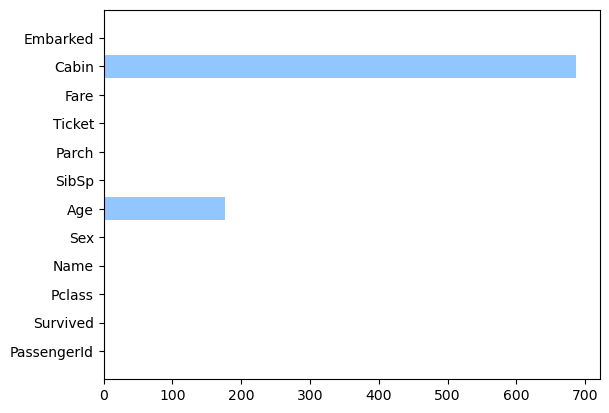

In [6]:
plt.barh(titanic.columns,titanic.isnull().sum())

In [7]:
#Checking records of the two passengers with no embarkation data
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
#Internet search showed that Mrs George Nelson and her maid, Miss Amelie Icard boarded at Southampton. 
titanic.loc[(61,829),'Embarked'] = 'S'

In [9]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
titanic.loc[(titanic[titanic['Cabin'].isnull()].index.to_list()),'Cabin'] = '¯\\_(ツ)_/¯'

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [11]:
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']

In [12]:
#Use regular expression to find the Reverends
rev_index = []
for name in titanic['Name']:
    if re.search(r'Rev\.',name) != None:
        rev_index.append(titanic[titanic['Name'] == name].index[0])

In [13]:
#creating new column 'IsReverend' and appending value 0 to non-Reverends and value 1 to Reverends
titanic.loc[rev_index,'IsReverend'] = int(1)
titanic.loc[(titanic[titanic['IsReverend'].isnull()].index.to_list()),'IsReverend'] = int(0)
titanic['IsReverend'] = titanic['IsReverend'].apply(np.int64)

In [14]:
titanic = pd.get_dummies(titanic, columns=['Embarked','Sex'])

In [15]:
#I'll do the bonus when I have time!

## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [16]:
survival = titanic['Survived'].apply(lambda x: 'Survived' if x == 1 else 'Victim')
survival.value_counts()

Victim      549
Survived    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Overall Titanic Survival Rate')

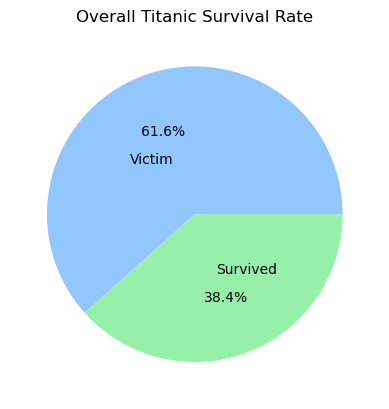

In [17]:
#Overall survival rate
survival.value_counts().plot(kind='pie', label='', autopct='%1.1f%%', labeldistance = 0.4)
plt.title('Overall Titanic Survival Rate')

In [18]:
survival = survival.to_frame()
survival['Sex'] = titanic['Sex_female'].apply(lambda x: 'Female' if x == 1 else 'Male')
survived_gender = survival[survival['Survived'] == 'Survived'].value_counts()
victim_gender = survival[survival['Survived'] != 'Survived'].value_counts()
survived_gender = survived_gender.sort_values()

Text(0.5, 1.0, 'Titanic Survival Outcome by Gender')

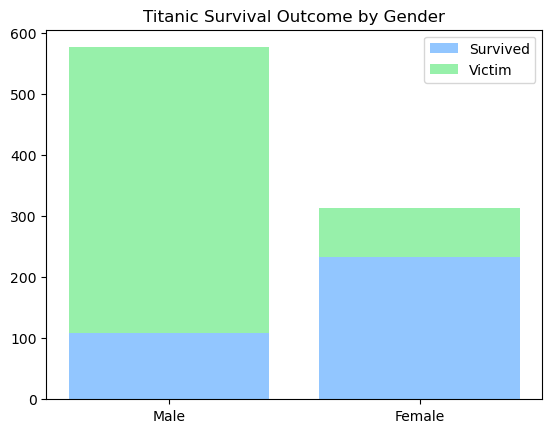

In [19]:
# Create a stacked bar chart to view gender-based survival
plt.bar(['Male','Female'], survived_gender, label='Survived')
plt.bar(['Male','Female'], victim_gender, label='Victim', bottom=survived_gender)
plt.legend()
plt.title('Titanic Survival Outcome by Gender')

In [20]:
survival_pro = survival.pivot_table(index=('Survived','Sex'), aggfunc=len)
survival_pro = survival_pro.to_frame()
survival_pro['% of total'] = round(survival_pro[0]/sum(survival_pro[0])*100,2)
survival_pro

0  % of total
Survived Sex                    
Survived Female  233       26.15
         Male    109       12.23
Victim   Female   81        9.09
         Male    468       52.53

In [21]:
survival.drop(columns='Sex', inplace=True)
survival['Class'] = titanic['Pclass']

In [22]:
#survival rate by Passenger Class
class_survival = survival.pivot_table(index=('Class','Survived'), aggfunc=len)
for x in class_survival.index[::2]:
    rate = round(class_survival[x]/sum(class_survival[x[0]])*100,2)
    print(f'The survival rate of passengers in Class {x[0]} is {rate}%')

The survival rate of passengers in Class 1 is 62.96%
The survival rate of passengers in Class 2 is 47.28%
The survival rate of passengers in Class 3 is 24.24%


In [23]:
#None of the 6 Revernends survived
titanic[titanic['IsReverend'] == 1]['Survived'].value_counts()

0    6
Name: Survived, dtype: int64

In [24]:
#survival rate for cabins marked ¯\\_(ツ)_/¯
cabin_survival = titanic[titanic['Cabin'] == '¯\\_(ツ)_/¯']['Survived'].value_counts()
cabin_survival_rate = round(cabin_survival[1]/sum(cabin_survival)*100,2)
print(f'The survival rate of passengers with no recorded cabin information is {cabin_survival_rate}%')

The survival rate of passengers with no recorded cabin information is 29.99%


In [25]:
#survival rate for people with no age information
no_age = titanic[titanic['Age'].isnull()]['Survived'].value_counts()
no_age_rate = round(no_age[1]/sum(no_age)*100,2)
print(f'The survival rate of passengers with no recorded cabin information is {no_age_rate}%')

The survival rate of passengers with no recorded cabin information is 29.38%


In [26]:
#Survival rate for those that board at Cherbourg
cherbourg = titanic[titanic['Embarked_C']==1]['Survived'].value_counts()
c_rate = round(cherbourg[1]/sum(cherbourg)*100,2)
print(f'The survival rate of passengers that boarded at Cherbourg is {c_rate}%')

The survival rate of passengers that boarded at Cherbourg is 55.36%


In [27]:
#Survival rate for those that board at Queenstown
queenstown = titanic[titanic['Embarked_Q']==1]['Survived'].value_counts()
q_rate = round(queenstown[1]/sum(queenstown)*100,2)
print(f'The survival rate of passengers that boarded at Queenstown is {q_rate}%')

The survival rate of passengers that boarded at Queenstown is 38.96%


In [28]:
#Survival rate for those that board at Southampton
southampton = titanic[titanic['Embarked_S']==1]['Survived'].value_counts()
s_rate = round(southampton[1]/sum(southampton)*100,2)
print(f'The survival rate of passengers that boarded at Southampton is {s_rate}%')

The survival rate of passengers that boarded at Southampton is 33.9%


In [29]:
#Survival rate of children under 12 in term of passenger class
under12 = titanic[titanic['Age']< 12].pivot_table(index = ('Pclass','Survived'), values = 'Name', aggfunc = len)

In [30]:
print(f"The survival rate of children under 12 in First Class is {under12.loc[(1,1)][0]/sum(under12.loc[(1)]['Name'])*100}%")
print(f"The survival rate of children under 12 in Second Class is {under12.loc[(2,1)][0]/sum(under12.loc[(2)]['Name'])*100}%")
print(f"The survival rate of children under 12 in Third Class is {round(under12.loc[(3,1)][0]/sum(under12.loc[(3)]['Name'])*100,2)}%")

The survival rate of children under 12 in First Class is 75.0%
The survival rate of children under 12 in Second Class is 100.0%
The survival rate of children under 12 in Third Class is 40.43%


In [31]:
#finding details of the passengers that paid the most for his/her ticket
titanic.loc[titanic['Fare'].idxmax()]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Age                        35.0
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                   512.3292
Cabin                 ¯\_(ツ)_/¯
FamilyCount                   0
IsReverend                    0
Embarked_C                    1
Embarked_Q                    0
Embarked_S                    0
Sex_female                    1
Sex_male                      0
Name: 258, dtype: object

In [32]:
#does having family on board hurt or increase chance of survival?
with_fam = titanic[titanic['FamilyCount']>0]['Survived'].value_counts()
no_fam = titanic[titanic['FamilyCount']==0]['Survived'].value_counts()

In [33]:
with_fam
print(f'The survival rate of passengers with family onboard is {round(with_fam[1]/sum(with_fam)*100,2)}%')
print(f'The survival rate of passengers without family onboard is {round(no_fam[1]/sum(no_fam)*100,2)}%')

The survival rate of passengers with family onboard is 50.56%
The survival rate of passengers without family onboard is 30.35%


## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

In [34]:
survival_by_class = titanic[titanic['Survived']==1]['Pclass'].value_counts()
victim_by_class = titanic[titanic['Survived']==0]['Pclass'].value_counts()

Text(0.5, 1.0, 'Titanic Survival Outcome by Passenger Class')

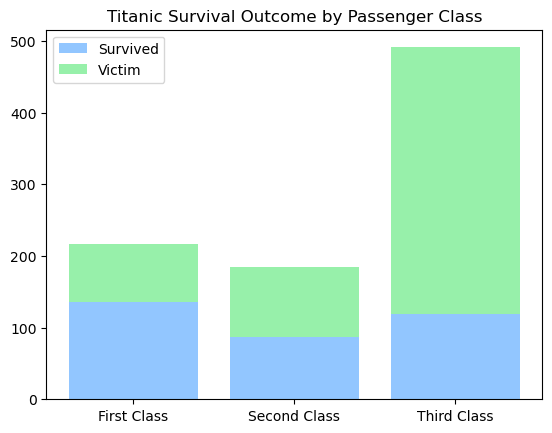

In [35]:
# Create a stacked bar chart to view passenger class-based survival
plt.bar(['First Class','Second Class', 'Third Class'], survival_by_class.sort_index(), label='Survived')
plt.bar(['First Class','Second Class', 'Third Class'], victim_by_class.sort_index(), label='Victim', bottom=survival_by_class.sort_index())
plt.legend()
plt.title('Titanic Survival Outcome by Passenger Class')

In [64]:
#View survival based on age group. I will group children as under 12, teens 12-18, adults 19-64 and elderly >64
survival_by_age = titanic[titanic['Survived']==1]['Age'].apply(lambda x: 'Children' if x < 12 
                                                               else ('Teen' if x >= 12 and x < 19 
                                                                     else ('Adult' if x >= 19 and x < 65 
                                                                           else 'Elderly')))

victim_by_age = titanic[titanic['Survived']==0]['Age'].apply(lambda x: 'Children' if x < 12 
                                                               else ('Teen' if x >= 12 and x < 19 
                                                                     else ('Adult' if x >= 19 and x < 65 
                                                                           else 'Elderly')))

#lambda <args> : <return Value> if <condition > ( <return value > if <condition> else <return value>)

In [67]:
survival_by_age = survival_by_age.value_counts().to_frame()
victim_by_age = victim_by_age.value_counts().to_frame()

In [69]:
survival_by_age = survival_by_age.reindex(['Children', 'Teen', 'Adult', 'Elderly'])
victim_by_age = victim_by_age.reindex(['Children', 'Teen', 'Adult', 'Elderly'])

Text(0.5, 1.0, 'Titanic Survival Outcome by Age Group')

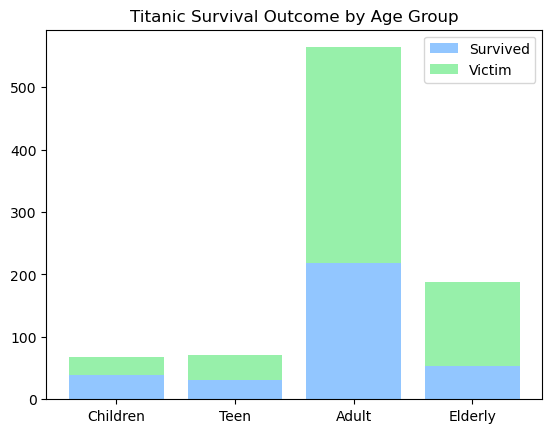

In [73]:
# Create a stacked bar chart to view age-based survival
plt.bar(['Children', 'Teen', 'Adult', 'Elderly'], survival_by_age['Age'], label='Survived')
plt.bar(['Children', 'Teen', 'Adult', 'Elderly'], victim_by_age['Age'], label='Victim', bottom=survival_by_age['Age'])
plt.legend()
plt.title('Titanic Survival Outcome by Age Group')

In [79]:
fc_fare = titanic[titanic['Pclass'] == 1]['Fare']
sc_fare = titanic[titanic['Pclass'] == 2]['Fare']
tc_fare = titanic[titanic['Pclass'] == 3]['Fare']
fare_col = [fc_fare, sc_fare, tc_fare]

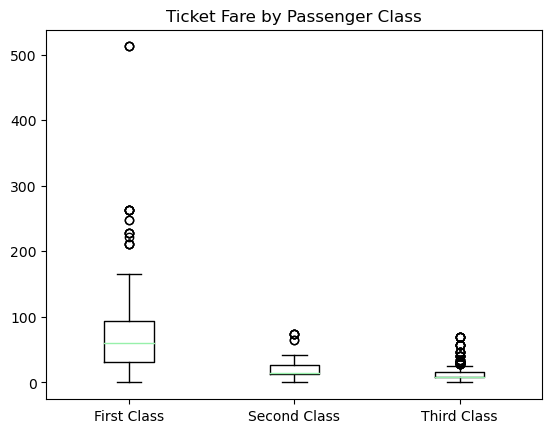

In [83]:
fig, ax = plt.subplots()
ax.boxplot(fare_col)
plt.xticks([1, 2, 3], ['First Class', 'Second Class', 'Third Class'])
plt.title('Ticket Fare by Passenger Class')
plt.show()